# Data Pre-Processing

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder

# post_vacc_inf = pd.read_csv("../data/Post-Vaccination_Infection_Data.csv")

vacc_prog = pd.read_csv("../data/Vaccine_Progress_Dashboard_Data.csv")

In [68]:
# # sum all values in vacc_prog by date
# vacc_prog_by_date = vacc_prog.groupby('administered_date', as_index=False).sum()

# # joining 2 tables into 1 by date
# vaccine_data = pd.merge(post_vacc_inf, vacc_prog_by_date, left_on='date', right_on='administered_date')
# vaccine_data

In [69]:
# Function to find NaN in a given dataset  
def returnNaNCount(dataset):
    output = {} 
    for column in dataset.columns:
        count = dataset[column].isnull().sum()
    if count > 0:
        output[column] = count
    return output 

In [70]:
# Replace nan value with median in post_vacc_inf
def nanReplacer(dataset,meth):
    data = dataset.copy()
    tempDict = returnNaNCount(dataset)
    for key in tempDict:
        if meth == 'median':
            data[key].fillna(data[key].median(),inplace=True)
        if meth == 'mean':
            data[key].fillna(data[key].mean(),inplace=True)
    return data

In [71]:
def scaler(data,range):
    tool = MinMaxScaler(feature_range = range)
    return pd.DataFrame(tool.fit_transform(data))

In [72]:
# Note the two dataframe needs to have same column number counts
def copyColumnName(tobeReplace,target):
    data = tobeReplace.copy()
    index = 0
    for column in target.columns:
        data = tobeReplace.rename({tobeReplace.columns[index]:column},axis=1,inplace=True)
        index += 1
    return data

In [73]:
# Drop column with sepcific names in array
def dropColumnName(tobeDrop,target):
    for column in target:
        if column in tobeDrop.columns.tolist():
            out = tobeDrop.drop([column],axis=1,inplace=True)
        else:
            continue

In [74]:
vacc_prog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36580 entries, 0 to 36579
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   county                          36580 non-null  object
 1   administered_date               36580 non-null  object
 2   total_doses                     36580 non-null  int64 
 3   cumulative_total_doses          36580 non-null  int64 
 4   pfizer_doses                    36580 non-null  int64 
 5   cumulative_pfizer_doses         36580 non-null  int64 
 6   moderna_doses                   36580 non-null  int64 
 7   cumulative_moderna_doses        36580 non-null  int64 
 8   jj_doses                        36580 non-null  int64 
 9   cumulative_jj_doses             36580 non-null  int64 
 10  partially_vaccinated            36580 non-null  int64 
 11  total_partially_vaccinated      36580 non-null  int64 
 12  fully_vaccinated                36580 non-null

In [75]:
column_tobe_droped = [
    'county',
    'cumulative_total_doses',
    'cumulative_pfizer_doses',
    'cumulative_moderna_doses',
    'cumulative_jj_doses',
    'cumulative_at_least_one_dose',
    'cumulative_booster_recip_count',
    'cumulative_fully_vaccinated',
    'total_partially_vaccinated'
]
dropColumnName(vacc_prog,column_tobe_droped)

In [76]:
tempPd = nanReplacer(vacc_prog,meth = 'median')

In [77]:
# post vacc inf encoding process
leEnc = LabelEncoder()
tempPd['administered_date'] = leEnc.fit_transform(tempPd['administered_date'])
tempPd['california_flag'] = leEnc.fit_transform(tempPd['california_flag'])
# tempPd['area_type'] = leEnc.fit_transform(tempPd['area_type'])

In [78]:
#new_tempPd = scaler(tempPd,(0,1)) # rescale

In [88]:
tempPd.head(5)

,administered_date,total_doses,pfizer_doses,moderna_doses,jj_doses,partially_vaccinated,fully_vaccinated,at_least_one_dose,california_flag,booster_recip_count
0,0,0,0,0,0,0,0,0,2,0
1,1,0,0,0,0,0,0,0,2,0
2,2,0,0,0,0,0,0,0,2,0
3,4,0,0,0,0,0,0,0,2,0
4,5,0,0,0,0,0,0,0,2,0


In [89]:
#copyColumnName(pd.DataFrame(new_tempPd),tempPd) # copy column names 

In [91]:
# exported to a new csv 
tempPd.to_csv('../data/vacc_prog_clean.csv')

# Data Training

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder

vacc_prog = pd.read_csv("../data/vacc_prog_clean.csv")

In [46]:
vacc_prog = vacc_prog.drop(vacc_prog.columns[0],axis=1)

In [47]:
vacc_prog.head(5)

,administered_date,total_doses,pfizer_doses,moderna_doses,jj_doses,partially_vaccinated,fully_vaccinated,at_least_one_dose,california_flag,booster_recip_count
0,0,0,0,0,0,0,0,0,2,0
1,1,0,0,0,0,0,0,0,2,0
2,2,0,0,0,0,0,0,0,2,0
3,4,0,0,0,0,0,0,0,2,0
4,5,0,0,0,0,0,0,0,2,0


In [48]:
from sklearn.model_selection import train_test_split

X = vacc_prog.drop(vacc_prog.columns[6],axis=1).values
y = vacc_prog.iloc[:,6].values

In [49]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
vacc_clf = DecisionTreeClassifier(criterion="entropy",min_samples_split=4,max_depth=3)
vacc_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=4)

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = vacc_clf.predict(X_test)
print("Accuracy: ", vacc_clf.score(X_test, y_test))
print("Confusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy:  0.27750165672630883
Confusion Matrix: 


array([[3345,    6,    0, ...,    0,    0,    0],
       [ 319,    5,    0, ...,    0,    0,    0],
       [ 242,    4,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

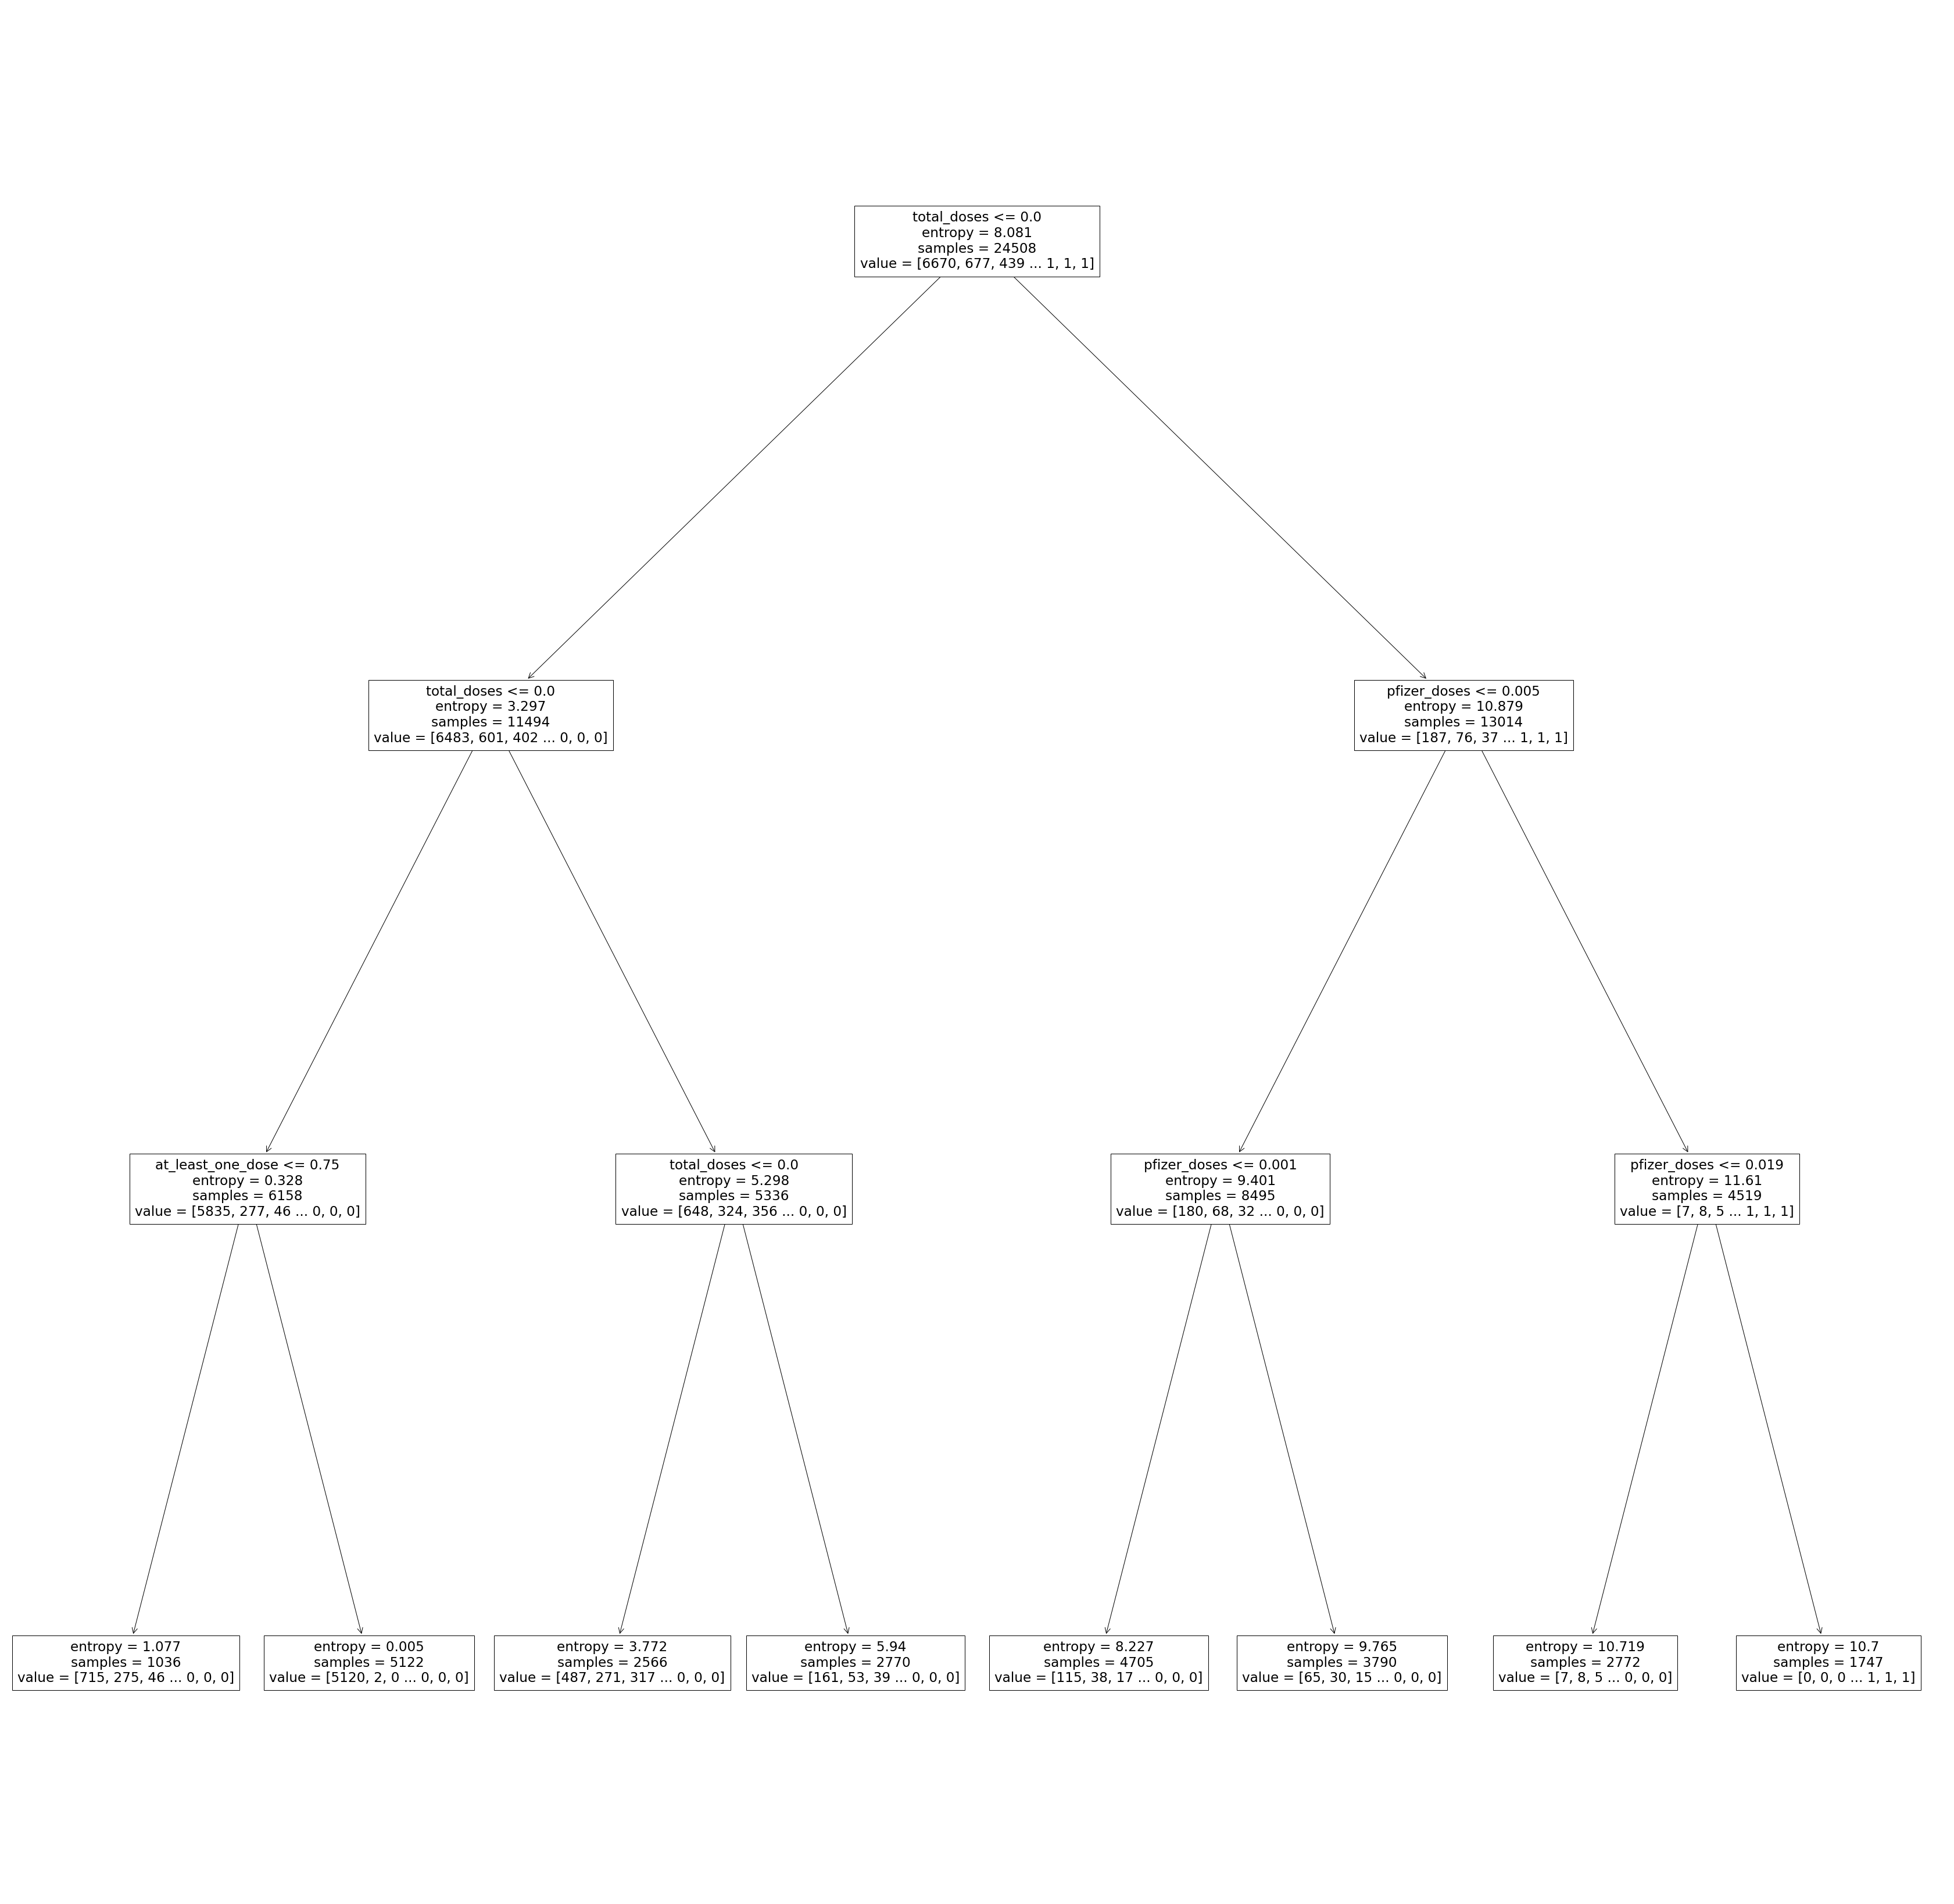

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,60))
fig = tree.plot_tree(vacc_clf, feature_names=vacc_prog.keys())

In [34]:
from sklearn import model_selection
fivefold = model_selection.KFold(n_splits=5)
dt_5fold = DecisionTreeClassifier(criterion="entropy",min_samples_split=4,max_depth=3)
results_5fold = model_selection.cross_val_score(dt_5fold, X_train, y_train, cv=fivefold)

print("Cross-validation results: ", results_5fold)
print("Accuracy: ", (results_5fold.mean()*100.0)) 

Cross-validation results:  [0.27131783 0.26560588 0.27192982 0.26953683 0.28279943]
Accuracy:  27.22379574156633


In [35]:
from sklearn.model_selection import GridSearchCV
max_depth = [3, 4, 5]
min_samples_split = [4, 10, 20]

grid = dict(max_depth=max_depth, min_samples_split=min_samples_split)
clf = GridSearchCV(estimator=dt_5fold, param_grid=grid, cv=5)
best_model = clf.fit(X_train, y_train)

best_score, best_params = best_model.best_score_, best_model.best_params_
print("Best score is: ", best_score)
print("Best parameters are: ", best_params)

C:\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best score is:  0.28786508985626547
Best parameters are:  {'max_depth': 5, 'min_samples_split': 10}


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=20,criterion='entropy',\
                                max_depth=2,min_samples_split=2)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=20)

In [58]:
y_pred = rf_clf.predict(X_test)
print("Accuracy: ", rf_clf.score(X_test, y_test))
print("Confusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy:  0.27244864148442677
Confusion Matrix: 


array([[3289,    0,    0, ...,    0,    0,    0],
       [ 325,    0,    0, ...,    0,    0,    0],
       [ 223,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

In [ ]:
from sklearn.model_selection import cross_val_score
# rf_clf = RandomForestClassifier(n_estimators=20,criterion='entropy',\
#                                 max_depth=3,min_samples_split=4)
results_5fold = np.mean(cross_val_score(rf_clf,X_train,y_train,cv=5))

print("Accuracy: ", (results_5fold*100.0)) 

In [59]:
n_estimators = [10,20,30]
max_depth = [5,7,9]
min_samples_split = [4, 10, 20]

grid = dict(n_estimators = n_estimators,max_depth=max_depth,\
            min_samples_split=min_samples_split)
rf = GridSearchCV(estimator=rf_clf, param_grid=grid, cv=5)
best_model = rf.fit(X_train, y_train)

best_score, best_params = best_model.best_score_, best_model.best_params_
print("Best score is: ", best_score)
print("Best parameters are: ", best_params)

C:\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best score is:  0.3097764542511287
Best parameters are:  {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 20}
